# Correlation

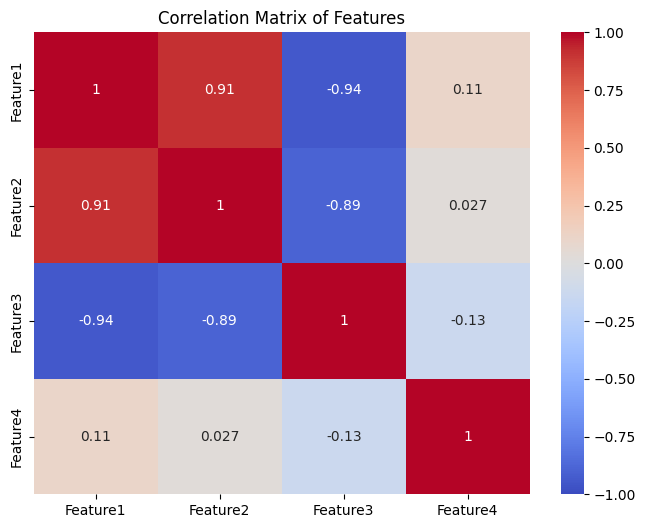

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic data
# np.random.seed(42)
x = np.random.rand(20) * 10
data = {
    'Feature1': x,
    'Feature2': x * 0.7 + 2,  # Positively correlated with Feature1
    'Feature3': -x * 0.9 + 2,  # Negatively correlated with Feature1
    'Feature4': np.random.rand(20) * 10,      # No correlation with Feature1
}

# Create a DataFrame
df = pd.DataFrame(data)

# Add some correlation between features
df['Feature2'] += df['Feature1'] * np.random.rand(20)
df['Feature3'] -= df['Feature1'] * np.random.rand(20)

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

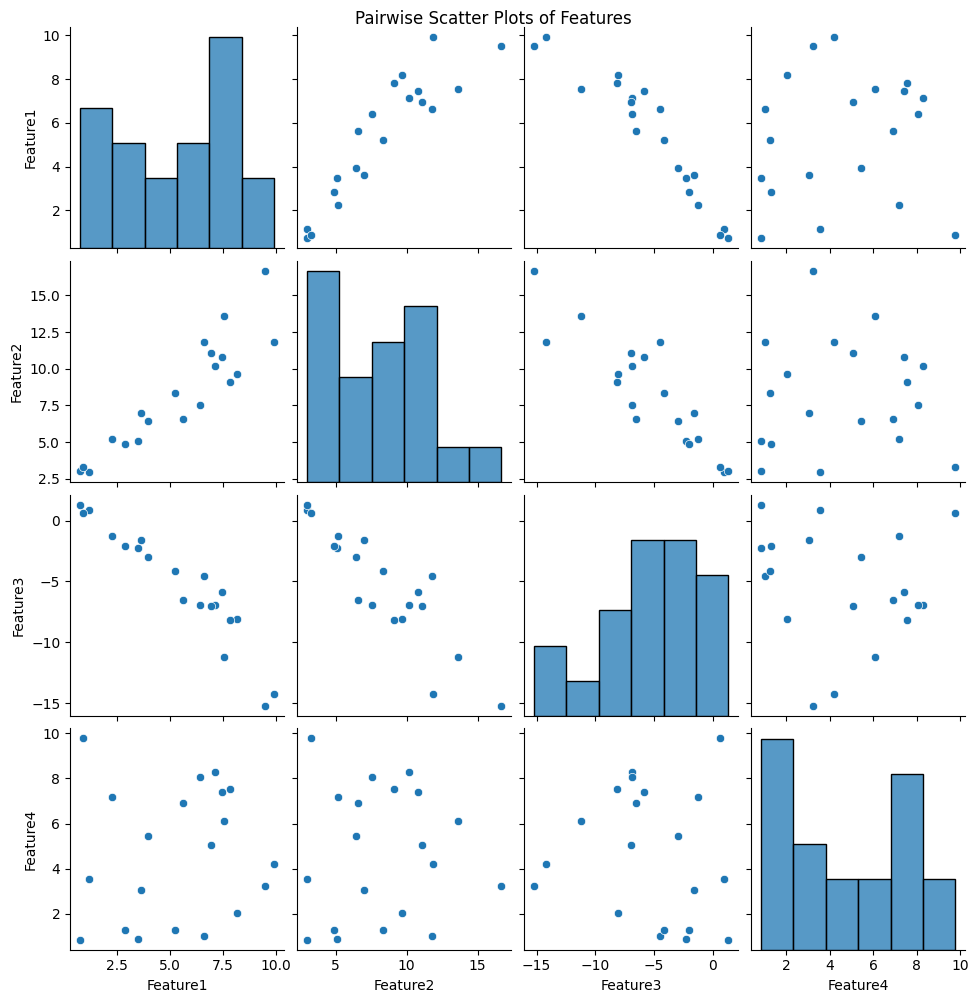

In [ ]:
sns.pairplot(df)
plt.suptitle('Pairwise Scatter Plots of Features', y=1)
plt.show()

In [ ]:
corr_matrix

,Feature1,Feature2,Feature3,Feature4
Feature1,1.000000,0.907202,-0.941050,0.105841
Feature2,0.907202,1.000000,-0.892782,0.027167
Feature3,-0.941050,-0.892782,1.000000,-0.128453
Feature4,0.105841,0.027167,-0.128453,1.000000


<ipython-input-4-259f0a2236f3>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


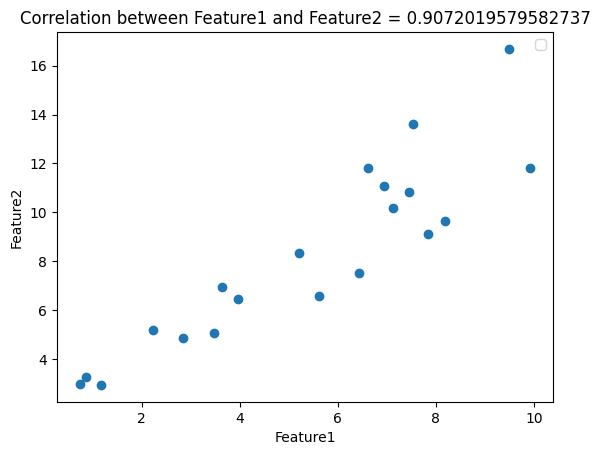

In [ ]:
plt.scatter(df['Feature1'], df['Feature2'])
plt.xlabel('Feature1')
plt.ylabel('Feature2')
title = 'Correlation between Feature1 and Feature2 = ' + str(corr_matrix['Feature1']['Feature2'])
plt.title(title)
plt.legend()


### Statistical significance

In [ ]:
from scipy.stats import t
from math import sqrt

# sample size
n = len(df['Feature1'])
lower_cv = t(n-1).ppf(.025)
upper_cv = t(n-1).ppf(.975)
# correlation coefficient
r = corr_matrix['Feature1']['Feature2']

# Perform the test
test_value = r / sqrt((1-r**2) / (n-2))

print("TEST VALUE: {}".format(test_value))
print("CRITICAL RANGE: {}, {}".format(lower_cv, upper_cv))

if test_value < lower_cv or test_value > upper_cv:
  	print("CORRELATION PROVEN, REJECT H0")
else:
  	print("CORRELATION NOT PROVEN, FAILED TO REJECT H0 ")

# Calculate p-value
if test_value > 0:
  	p_value = 1.0 - t(n-1).cdf(test_value)
else:
  	p_value = t(n-1).cdf(test_value)

# Two-tailed, so multiply by 2
p_value = p_value * 2
print("P-VALUE: {}".format(p_value))


TEST VALUE: 9.148975885849483
CRITICAL RANGE: -2.0930240544082634, 2.093024054408263
CORRELATION PROVEN, REJECT H0
P-VALUE: 2.161601853067907e-08


# Linear Regression

In [ ]:
# Dataset
X = np.array([2, 4, 5, 6, 6, 8, 8, 9, 9])
y = np.array([1, 4, 4, 5, 6, 7, 6 , 8, 10])

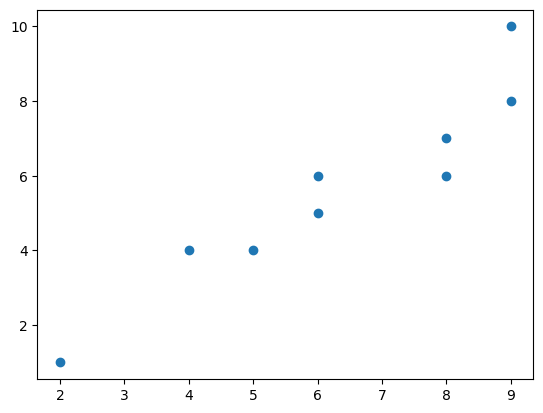

In [ ]:
# Visualization
def Plotter(X, y, a=None, b=None):
    plt.scatter(X, y)
    minX = min(X)
    maxX = max(X)
    if (a != None and b != None):
        miny = a * minX + b
        maxy = a * maxX + b
        plt.plot([minX, maxX], [miny, maxy])
    plt.show()

Plotter(X, y)

In [ ]:
# Cost function of linear regression
def ErrorFunction(X, y, n, a, b):
    Err = 0
    for i in range(n):
        Err += ((a * X[i] + b)-y[i]) ** 2

    return 1/(2 * n) * Err

Error =  0.49368696844993126
Error =  0.37862240868134295
Error =  0.3766037196488945
Error =  0.3746726733141712
Error =  0.3728254646124301
Error =  0.37105845367828927
Error =  0.369368158673491
Error =  0.36775124892605054
Error =  0.36620453836727496
Error =  0.3647249792537154
0.9172191431280469 -0.05986769786240904


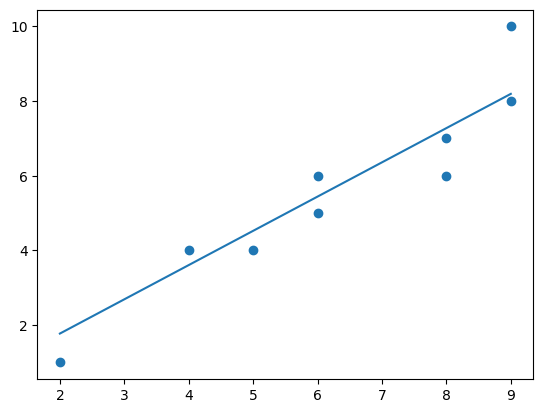

In [ ]:
def GredientDescent(X, y, a=0, b=0):
    learning_rate = 0.02
    epochs = 100

    n = len(X)
    for epoch in range(epochs):
        delta_E_a = delta_E_b = 0
        for i in range(n):
            delta_E_a += (((a * X[i] + b) - y[i]) * X[i])
            delta_E_b += ((a * X[i] + b) - y[i])

        a -= learning_rate * delta_E_a/n
        b -= learning_rate * delta_E_b/n
        if (epoch % 10 == 0):
            print("Error = ", ErrorFunction(X, y, n, a, b))

    return a, b

a, b = GredientDescent(X, y, a=0, b=0)
print(a, b)
Plotter(X, y, a, b)

Error =  10.648405203473546
Error =  0.633259412364149
Error =  0.5385331552522479
Error =  0.5256617910147945
Error =  0.5156954128367989
Error =  0.5062560853612373
Error =  0.49724625108307857
Error =  0.48864560947390734
Error =  0.48043714127026416
Error =  0.4726045877898513
0.843998106807485 -0.0042415214967045


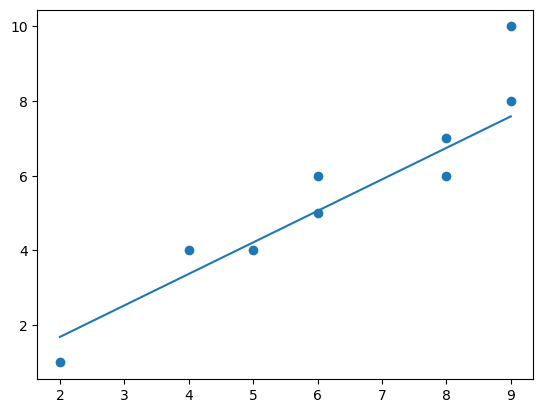

In [ ]:
def StocastincGredientDescent(X, y, a=0, b=0):
    learning_rate = 0.02
    epochs = 100
    batch_size = 3

    n = len(X)
    for epoch in range(epochs):

        for i in range(0, n, batch_size):
            x_batch = X[i:i + batch_size]
            y_batch = y[i:i + batch_size]

            delta_E_a = delta_E_b = 0
            for j in range(batch_size):
                delta_E_a += (((a * X[j] + b) - y[j]) * X[j])
                delta_E_b += ((a * X[j] + b) - y[j])

            a -= learning_rate * delta_E_a/n
            b -= learning_rate * delta_E_b/n

        if (epoch % 10 == 0):
            print("Error = ", ErrorFunction(X, y, n, a, b))

    return a, b

a, b = StocastincGredientDescent(X, y, a=0, b=0)
print(a, b)
Plotter(X, y, a, b)

# Analytical Approach

[[1. 2.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 6.]
 [1. 8.]
 [1. 8.]
 [1. 9.]
 [1. 9.]]
[ 1  4  4  5  6  7  6  8 10]
[-0.80434783  1.02173913]
0.33212560386473433


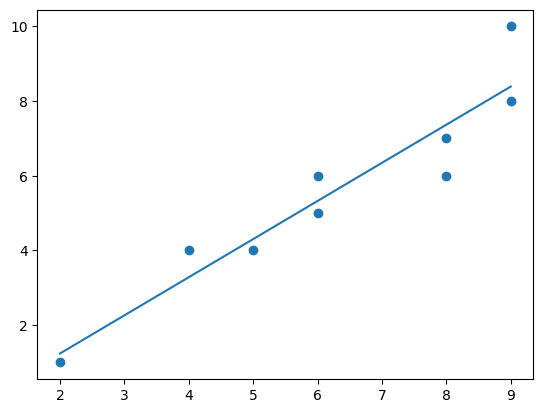

In [ ]:
from numpy.linalg import inv
# Add placeholder "1" column to generate intercept
# Ensure X_1 is created using the correct number of data points from df
X_1 = np.vstack([np.ones(len(X)), X]).T
print(X_1)
# Extract output column (all rows, last column) - This line was correct
print(y)
# Calculate coefficents for slope and intercept
beta = inv(X_1.T @ X_1) @ (X_1.T @ y)
print(beta)
# Predict against the y-values
y_predict = X_1.dot(beta)

Err = ErrorFunction(X, y, len(y), beta[1], beta[0])
print(Err)
Plotter(X, y, beta[1], beta[0])



### Prediction intervals

In [ ]:
import pandas as pd
from scipy.stats import t
from math import sqrt

n = len(X)
# Linear Regression Line
m = beta[1]
b = beta[0]

# Calculate Prediction Interval for x = 8.5
x_0 = 8.5
x_mean = sum(x for x in X) / len(X)
t_value = t(n - 2).ppf(.975)

y_predict = X_1.dot(beta)

standard_error = sqrt(sum((y[i] - y_predict[i]) ** 2 for i in range(n)) / (n - 2))

margin_of_error = t_value * standard_error * sqrt(1 + (1 / n) + (n * (x_0 - x_mean) ** 2) / ((n * sum(x ** 2 for x in X)- sum(x for x in X) ** 2)))

predicted_y = m*x_0 + b
# Calculate prediction interval
print(predicted_y)
print(predicted_y - margin_of_error, predicted_y + margin_of_error)


7.880434782608699
5.473522004216161 10.287347561001237


# Non linear regression + Regularization

In [ ]:
X = np.array([1, 2, 3, 4, 5, 6])
y = np.array([3, 7.5, 12.5, 18, 26, 40])

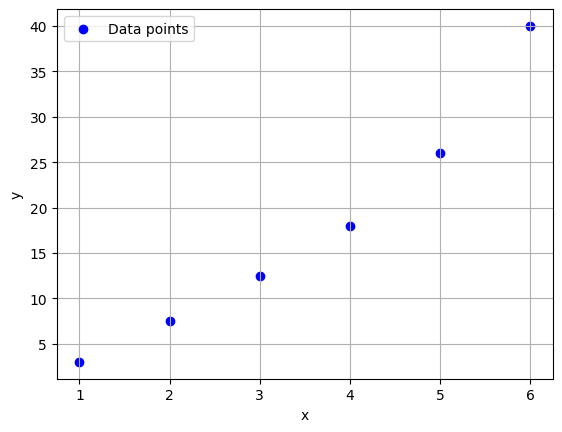

In [ ]:
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
X_1 = np.vstack([np.ones(len(X)), X, X**2]).T
X_1

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.]])

[0. 0. 0. 0. 0. 0.]
[0.05213333 0.1866     0.40518333 0.70788333 1.0947     1.56563333]
[0.1022191 0.365855  0.7944075 1.3878766 2.1462623 3.0695646]
[0.15033799 0.53805444 1.1683014  2.04107885 3.1563868  4.51422525]
[0.1965675  0.70347636 1.52746914 2.66854583 4.12670643 5.90195094]
[0.2409821  0.86238783 1.87249102 3.27129166 5.05878975 7.23498529]
[0.28365329 1.01504541 2.20392449 3.85029053 5.95414352 8.51548347]
[0.32464978 1.16169554 2.52230501 4.40647821 6.81421513 9.74551577]
[ 0.36403757  1.30257494  2.82814696  4.94075362  7.64039492 10.92707086]
[ 0.40188004  1.43791103  3.12194443  5.45398024  8.43401845 12.06205907]
[ 0.43823808  1.56792224  3.40417206  5.94698753  9.19636865 13.15231543]
[ 0.47317021  1.69281842  3.67528577  6.42057226  9.92867789 14.19960266]
[ 0.5067326   1.81280111  3.93572352  6.8754998  10.63212998 15.20561404]
[ 0.53897923  1.92806396  4.18590601  7.31250538 11.30786208 16.1719761 ]
[ 0.56996195  2.03879293  4.42623736  7.73229523 11.95696654 17.10

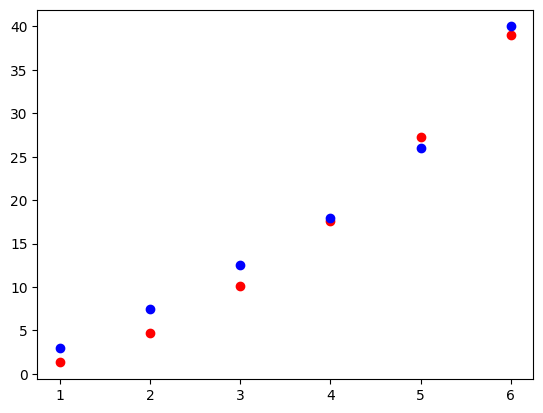

In [ ]:
learning_rate = 0.0001
epochs = 100
beta = np.zeros(3)

n = len(X)
for epoch in range(epochs):
    delta = np.zeros(3)
    y_pred = X_1.dot(beta)
    print(y_pred)

    for j in range(3):
        delta[j] = ((y_pred - y) @ X_1[:, j] + 0.01 * beta[j])


    beta -= learning_rate * delta/n


print(beta)

y_pred = X_1.dot(beta)
plt.scatter(X, y_pred, color='red', label='Linear Regression')
plt.scatter(X, y, color='blue', label='Data points')